In [1]:
# import the experiment utilities package
import exputils as eu
import numpy as np

# define what data should be loaded and some extra statistics that should be computed                
loader_config = eu.AttrDict(
    load_experiment_data_function = eu.AttrDict(
        pre_allowed_data_filter = [
            'rollout_ep_',
        ],
    )
)       
                
# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget(config=loader_config)
display(experiment_data_loader)

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

Output()

In [2]:
import numpy as np
import matplotlib
def average_reward_over_time(file):
    # read the data from the .npy file
    data = np.load(file, allow_pickle = True)
    # min-max normalize the data
    data = (data + 200) / (200 - 11)
    # calculate the area under the curve of data against time
    area = np.trapz(data, dx = 1)
    # calculate the normalized area under the curve
    norm_area = area / data.shape[0]
    # map it to [0,1], given the range of the data is [-12, -200]
    return norm_area


In [3]:
def count_params(file):
    data = np.load(file, allow_pickle = True)
    return data

In [4]:
def reward_over_entire_training(file):
    data = np.load(file, allow_pickle = True)
    #data = data[-1:]
    sum_data = data.sum()
    normalized_sum = sum_data / data.shape[0]
    return normalized_sum
        

# NUMBER OF PARAMETRS VS AVG REWARD

In [6]:
# LEVEL 1

scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "220401", #8
        "220301", # 16
        "220101", # 32
]
experiment_ids_urbf = [
        "1111311", #8
        "1111111", # 16
        "1111011", # 32
]

experiment_ids_mrbf = [
        "4111311", #8
        "4111111", #16
        "4111011", #32
]


# MLP
results_mlp_mean = []
results_mlp_std = []
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return_mlp = [ret  for ret in avg_return]
    results_mlp_mean.append(np.mean(avg_return_mlp))
    results_mlp_std.append(np.std(avg_return_mlp))
    print(f"{np.mean(avg_return_mlp):0.3f} ({np.std(avg_return_mlp):0.3f}) (params: {param})")
print(params_mlp, results_mlp_mean)

#RBF
results_urbf = []
results_rbf_mean = []
results_rbf_std = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    params.append(param)
    avg_return = [ret  for ret in avg_return]
    results_rbf_mean.append(np.mean(avg_return))
    results_rbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
    
    

# MRBF
results_mrbf = []
results_mrbf_mean = []
results_mrbf_std = []
params_mrbf = []


for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    params_mrbf.append(param)
    avg_return = [ret  for ret in avg_return]
    results_mrbf_mean.append(np.mean(avg_return))
    results_mrbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.2f} ({np.std(avg_return):0.2f}) (params: {param})")


220401
3.306 (1.878) (params: 340568)
220301
3.940 (2.524) (params: 392808)
220101
5.043 (1.266) (params: 497288)
[340568, 392808, 497288] [3.305500158691406, 3.9395000610351567, 5.0428001953125]
1111311
4.018 (2.268) (params: 289432)
1111111
5.317 (0.935) (params: 421864)
1111011
5.131 (2.433) (params: 686728)
4111311
2.08 (2.82) (params: 340568)
4111111
0.09 (0.45) (params: 392808)
4111011
-0.12 (0.04) (params: 497288)


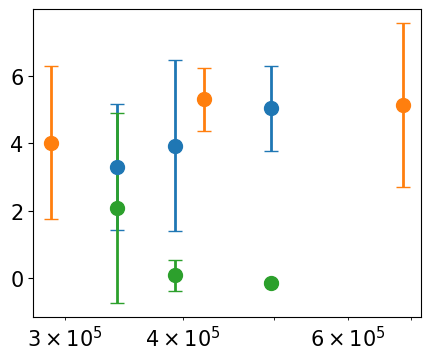

In [10]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
plt.xscale("log")
# plot the results both mean and std
plt.errorbar(params_mlp, results_mlp_mean, yerr=results_mlp_std, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params, results_rbf_mean, yerr=results_rbf_std, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf, results_mrbf_mean, yerr=results_mrbf_std, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_barsimg_1_mrbf.pdf", format="pdf", bbox_inches="tight")

In [6]:
# level 2
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "220402", #8
        "220302", # 16
        "220102", # 32
]
experiment_ids_urbf = [
        "1111312", #8
        "1111112", # 16
        "1111012", # 32
]


experiment_ids_mrbf = [
    "4111312",
    "4111112",
    "4111012",
]


params_mlp2 = []
results_mlp_mean2 = []
results_mlp_std2 = []
results_rbf_mean2 = []
results_rbf_std2 = []
params_rbf2 = []

# MLP
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = count_params(file1)
    avg_return_mlp_2 = [ret for ret in avg_return]
    params_mlp2.append(param)
    results_mlp_std2.append(np.std(avg_return_mlp_2))
    results_mlp_mean2.append(np.mean(avg_return_mlp_2))
    print(f"{np.mean(avg_return_mlp_2):0.3f} ({np.std(avg_return_mlp_2):0.3f}) (params: {param}) ")

# U-RBF
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_2 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_rbf2.append(param)
    results_rbf_mean2.append(np.mean(avg_return_urbf_2))
    results_rbf_std2.append(np.std(avg_return_urbf_2))
    
    print(f"{np.mean(avg_return_urbf_2):0.3f} ({np.std(avg_return_urbf_2):0.3f}) (params: {param})")
    
    
    
# MRBF
results_mrbf2 = []
results_mrbf_mean2 = []
results_mrbf_std2 = []
params_mrbf2 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf2.append(avg_return)
    params_mrbf2.append(param)
    avg_return_mrbf_2 = [ret  for ret in avg_return]
    results_mrbf_mean2.append(np.mean(avg_return))
    results_mrbf_std2.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_2):0.2f} ({np.std(avg_return_mrbf_2):0.2f}) (params: {param})")



220402
1.866 (2.836) (params: 340568) 
220302
2.999 (2.826) (params: 392808) 
220102
2.954 (2.746) (params: 497288) 
1111312
1.406 (2.310) (params: 289432)
1111112
2.232 (2.467) (params: 421864)
1111012
2.247 (2.659) (params: 686728)
4111312
0.48 (1.38) (params: 340568)
4111112
-0.14 (0.10) (params: 392808)
4111012
-0.12 (0.07) (params: 497288)


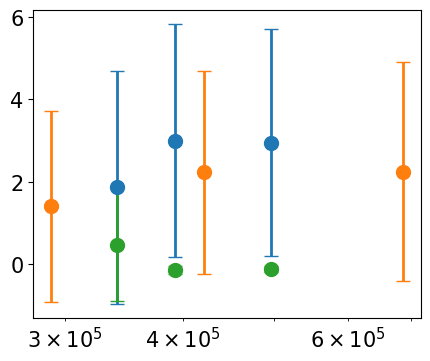

In [25]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
plt.xscale("log")
# plot the results both mean and std
plt.errorbar(params_mlp2, results_mlp_mean2, yerr=results_mlp_std2, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf2, results_rbf_mean2, yerr=results_rbf_std2, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf2, results_mrbf_mean2, yerr=results_mrbf_std2, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_barsimg_2_mrbf.pdf", format="pdf", bbox_inches="tight")

In [7]:
# level 3
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "220403", #8
        "220303", # 16
        "220103", # 32
]
experiment_ids_urbf = [
        "1111313", #8
        "1111113", # 16
        "1111013", # 32
]


experiment_ids_mrbf = [
    "4111313",
    "4111113",
    "4111013",
]


params_mlp3 = []
results_mlp_mean3 = []
results_mlp_std3 = []
results_rbf_mean3 = []
results_rbf_std3 = []
params_rbf3 = []

# MLP
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = count_params(file1)
    avg_return_mlp_3 = [ret for ret in avg_return]
    #params_mlp3.append(param)
    results_mlp_std3.append(np.std(avg_return_mlp_3))
    results_mlp_mean3.append(np.mean(avg_return_mlp_3))
    #print(f"{np.mean(avg_return_mlp_3):0.3f} ({np.std(avg_return_mlp_3):0.3f}) (params: {param}) ")

# U-RBF
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_3 = [ret  for ret in avg_return]
    #param = count_params(file1)
    #params_rbf3.append(param)
    results_rbf_mean3.append(np.mean(avg_return_urbf_3))
    results_rbf_std3.append(np.std(avg_return_urbf_3))
    
    #print(f"{np.mean(avg_return_urbf_3):0.3f} ({np.std(avg_return_urbf_3:0.3f}) (params: {param})")
    
    
    
# MRBF
results_mrbf3 = []
results_mrbf_mean3 = []
results_mrbf_std3 = []
params_mrbf3 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    results_mrbf3.append(avg_return)
    #params_mrbf3.append(param)
    avg_return_mrbf_3 = [ret  for ret in avg_return]
    results_mrbf_mean3.append(np.mean(avg_return))
    results_mrbf_std3.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_3):0.2f} ({np.std(avg_return_mrbf_3):0.2f}) (params: {param})")



220403
220303
220103
1111313
1111113
1111013
4111313
-0.23 (0.43) (params: 0)
4111113
-0.26 (0.15) (params: 0)
4111013
-0.24 (0.13) (params: 0)


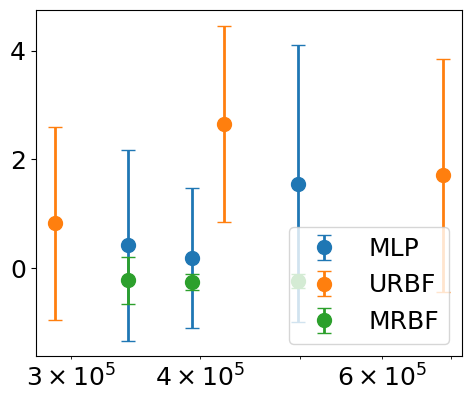

In [9]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.5, 4.5))
plt.xscale("log")
# plot the results both mean and std
plt.errorbar(params_mlp2, results_mlp_mean3, yerr=results_mlp_std3, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf2, results_rbf_mean3, yerr=results_rbf_std3, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf2, results_mrbf_mean3, yerr=results_mrbf_std3, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 18})
plt.legend(loc="lower right")
plt.savefig("error_barsimg_3_mrbf.pdf", format="pdf", bbox_inches="tight")

# UTESTS

In [6]:
# UTEST FOR EXPERIMENT 1
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "220401", #8
        "220301", # 16
        "220101", # 32
        #"020361", 
        #"020351",
        #"020341",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "1111311", #8
        "1111111", # 16
        "1111011", # 32
        #"111231",
        #"111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]


results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

0 0.5476190476190477
1 0.8412698412698413
2 0.42063492063492064


In [13]:
# UTEST FOR EXPERIMENT 2
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "220402", #8
        "220302", # 16
        "220102", # 32
        #"020361", 
        #"020351",
        #"020341",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "1111312", #8
        "1111112", # 16
        "1111012", # 32
        #"111231",
        #"111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

0 0.6904761904761905
1 0.8412698412698413
2 1.0


In [14]:
# UTEST FOR EXPERIMENT 3
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "220403", #8
        "220303", # 16
        "220103", # 32
        #"020361", 
        #"020351",
        #"020341",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "1111313", #8
        "1111113", # 16
        "1111013", # 32
        #"111231",
        #"111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

0 0.6904761904761905
1 0.15079365079365079
2 0.42063492063492064


In [3]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
def count_params(file):
    data = np.load(file, allow_pickle = True)
    return data

In [5]:
def reward_over_entire_training(file):
    data = np.load(file, allow_pickle = True)
    data = data[-1:]
    sum_data = data.sum()
    normalized_sum = sum_data / data.shape[0]
    return normalized_sum
    

In [6]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "220101",
        "220301",
        "220401",
        "220501",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "1111011",
        "1111111",
        "1111311",
        "1111411",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)
    #avg_return = [ret / 9 for ret in avg_return]
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    params.append(param)
    #avg_return = [ret / 9 for ret in avg_return]
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
lenght_episodes = np.load('../experiments/experiment_020391/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
print(lenght_episodes[-1:])


220101


FileNotFoundError: [Errno 2] No such file or directory: '../experiments/experiment_220101/repetition_000004/data/learnable_params.npy'

In [12]:
# level 3
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "020103",
        "020303",
        "020403",
        "020503",
]
experiment_ids_urbf = [
        "111013",
        "111113",
        "111313",
        "111413",
]
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return = [ret / 9 for ret in avg_return]
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f})")

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
    #params.append(param)
    avg_return = [ret / 9 for ret in avg_return]
    param = 0
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
#lenght_episodes = np.load('../experiments/experiment_020391/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
#print(lenght_episodes[-1:])


020103
-0.016 (0.009)
020303
-0.004 (0.009)
020403
-0.007 (0.013)
020503
-0.002 (0.004)
111013
-0.007 (0.009) (params: 0)
111113
0.167 (0.361) (params: 0)
111313
-0.027 (0.013) (params: 0)
111413
-0.011 (0.017) (params: 0)


In [9]:
# level 2
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "020102",
        "020302",
        "020402",
        "020502",
]
experiment_ids_urbf = [
        "111012",
        "111112",
        "111312",
        "111412",
]
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return = [ret / 9 for ret in avg_return]
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f})")

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
    #params.append(param)
    avg_return = [ret / 9 for ret in avg_return]
    param = 0
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
#lenght_episodes = np.load('../experiments/experiment_020391/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
#print(lenght_episodes[-1:])


020102
0.000 (0.000)
020302
0.109 (0.126)
020402
0.000 (0.007)
020502
-0.002 (0.004)
111012
0.162 (0.358) (params: 0)
111112
0.178 (0.361) (params: 0)
111312
-0.007 (0.009) (params: 0)
111412
0.160 (0.326) (params: 0)


In [11]:
# level 1
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "020101",
        "020301",
        "020401",
        "020501",
]
experiment_ids_urbf = [
        "111011",
        "111111",
        "111311",
        "111411",
]
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    #params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return = [ret / 9 for ret in avg_return]
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f})")

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(5):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            #file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #param = int(count_params(file1))
    results_urbf.append(avg_return)
    #params.append(param)
    avg_return = [ret / 9 for ret in avg_return]
    param = 0
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
#lenght_episodes = np.load('../experiments/experiment_020391/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
#print(lenght_episodes[-1:])


020101
0.140 (0.291)
020301
-0.004 (0.009)
020401
-0.007 (0.009)
020501
0.002 (0.016)
111011
0.344 (0.401) (params: 0)
111111
0.020 (0.040) (params: 0)
111311
0.018 (0.170) (params: 0)
111411
0.102 (0.204) (params: 0)


020103 5
repetition not found
020103 6
repetition not found
020103 7
repetition not found
020103 8
repetition not found
020103 9
repetition not found
020103
020303 5
repetition not found
020303 6
repetition not found
020303 7
repetition not found
020303 8
repetition not found
020303 9
repetition not found
020303
020403 5
repetition not found
020403 6
repetition not found
020403 7
repetition not found
020403 8
repetition not found
020403 9
repetition not found
020403
020503 5
repetition not found
020503 6
repetition not found
020503 7
repetition not found
020503 8
repetition not found
020503 9
repetition not found
020503
(40, 1)
111013 5
repetition not found
111013 6
repetition not found
111013 7
repetition not found
111013 8
repetition not found
111013 9
repetition not found
111113 5
repetition not found
111113 6
repetition not found
111113 7
repetition not found
111113 8
repetition not found
111113 9
repetition not found
111313 5
repetition not found
111313 6
repetition not found
1113

<AxesSubplot: xlabel='Human Normalized Score $(\\tau)$', ylabel='Fraction of runs with score $> \\tau$'>

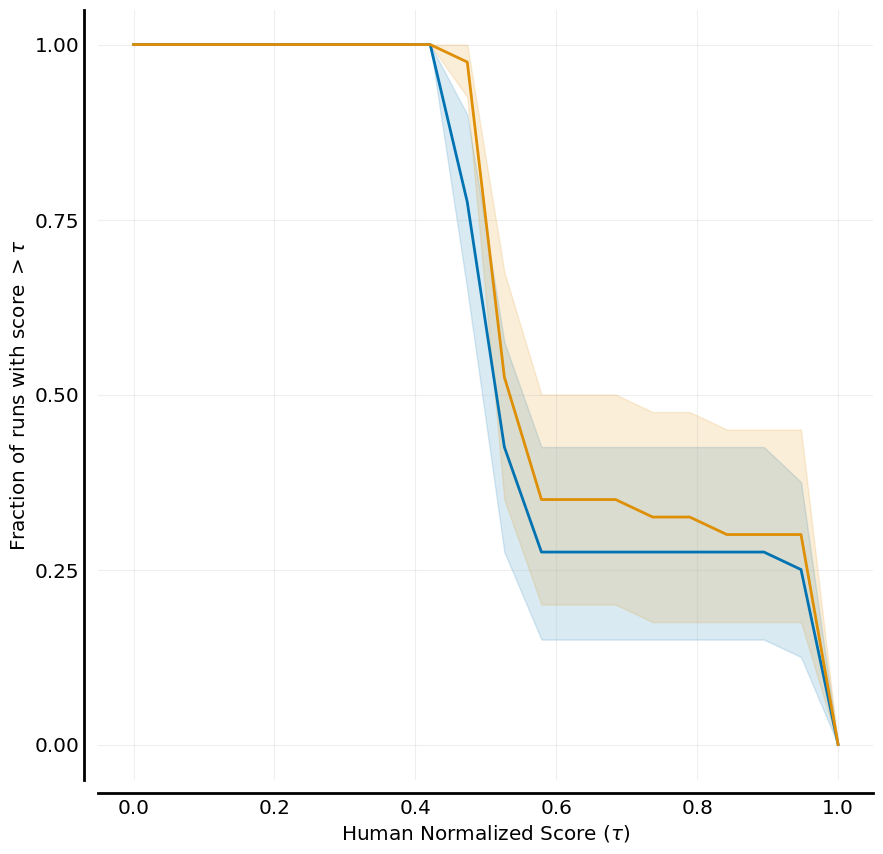

In [2]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        "020103",
        "020303",
        "020403",
        "020503",



]
experiment_ids_urbf = [
        "111013",
        "111113",
        "111313",
        "111413",


]

for ids in experiment_ids_mlp:
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/rollout_ep_rew_mean.npy'
            data = np.load(file, allow_pickle=True)
            data = (data + 200) / (200 - 11)
            data_arr.append(data[-1])
        except:
            print(ids, j)
            data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
scores['mlp'] = np.array(data_arr)
scores['mlp'] = scores['mlp'].reshape(scores['mlp'].shape[0], 1)
print(scores['mlp'].shape)
data_arr = []
for ids in experiment_ids_urbf:
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/rollout_ep_rew_mean.npy'
            data = np.load(file, allow_pickle=True)
            data = (data + 200) / (200 - 11)
            data_arr.append(data[-1])
        except:
            print(ids, j)
            data_arr.append(data[-1])
            print("repetition not found")
scores['urbf'] = np.array(data_arr)
scores['urbf'] = scores['urbf'].reshape(scores['urbf'].shape[0], 1)
print(scores['urbf'].shape)
task_thresholds = np.linspace(0.0, 1.0, 20)
score_distributions, score_distributions_cis = rly.create_performance_profile(
    scores, task_thresholds)
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
plot_utils.plot_performance_profiles(
  score_distributions, task_thresholds,
  performance_profile_cis=score_distributions_cis,
  colors=dict(zip(algorithm, sns.color_palette('colorblind'))),
  xlabel=r'Human Normalized Score $(\tau)$',
  ax=ax)


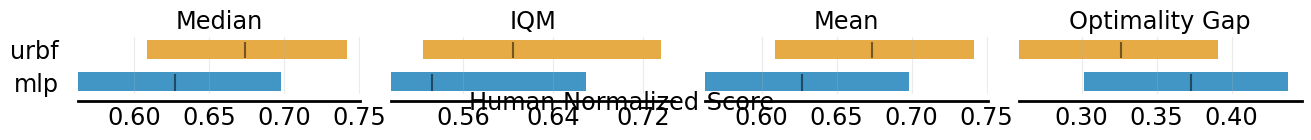

In [3]:
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  scores, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithm, xlabel='Human Normalized Score')


<AxesSubplot: xlabel='P(X > Y)', ylabel='Algorithm X'>

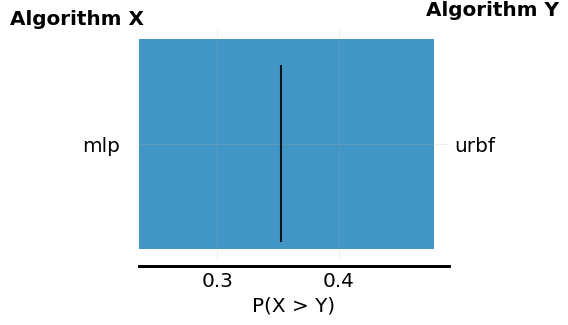

In [7]:
procgen_algorithm_pairs = {'mlp,urbf': (scores['mlp'], scores['urbf'])}
average_probabilities, average_prob_cis = rly.get_interval_estimates(
  procgen_algorithm_pairs, metrics.probability_of_improvement, reps=2000)
plot_utils.plot_probability_of_improvement(average_probabilities, average_prob_cis)


In [1]:
import numpy as np
import matplotlib
def average_reward_over_time(file):
    # read the data from the .npy file
    data = np.load(file, allow_pickle = True)
    # min-max normalize the data
    data = (data + 200) / (200 - 11)
    # calculate the area under the curve of data against time
    area = np.trapz(data, dx = 1)
    # calculate the normalized area under the curve
    norm_area = area / data.shape[0]
    # map it to [0,1], given the range of the data is [-12, -200]
    return norm_area


In [2]:
    # URBF Level 3
    average_reward_list = []
    experiment_ids = [
        "111013",
        "111113",
        "111313",
        "111413",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

111013
0.7792 (0.143)
111113
0.5814 (0.090)
111313
0.5634 (0.116)
111413
0.4932 (0.014)


In [5]:
    # MLP Level 1
    average_reward_list = []
    experiment_ids = [
        "020001",
        "020301",
        "020401",
        "020501",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/experiment_020001/repetition_000000/data/rollout_ep_rew_mean.npy'

In [6]:
    # URBF level 1
    average_reward_list = []
    experiment_ids = [
        "111011",
        "111111",
        "111311",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/experiment_111011/repetition_000000/data/rollout_ep_rew_mean.npy'

In [7]:
    # MLP level 2
    average_reward_list = []
    experiment_ids = [
        "020102",
        "020302",
        "020402",
        "020502"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/experiment_020102/repetition_000000/data/rollout_ep_rew_mean.npy'

In [8]:
    # URBF level 2
    average_reward_list = []
    experiment_ids = [
        "111012",
        "111112",
        "111312",
        "111412"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/experiment_111012/repetition_000000/data/rollout_ep_rew_mean.npy'

In [3]:
    # MLP Level 3
    average_reward_list = []
    experiment_ids = [
        "020103",
        "020303",
        "020403",
        "020503",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020103
0.7708 (0.071)
020303
0.5336 (0.106)
020403
0.4776 (0.012)
020503
0.4942 (0.014)


# Total Return

In [ ]:
# parameters
experiment_ids = [
    #'00000',
    '10300',
    #'25300',
    '60300',
    '70300',
    '80311',
]

labels = [
    #'Random',
    'QL', 
    #'SFQL (O)', 
    #'MF Xi', 
    #'MB Xi',
    'SFQL', 
    'MF Xi', 
    'MB Xi'
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_template in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    #cur_data.sems = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id = '{}{}'.format(experiment_id_template, range_idx)
    
        total_rewards = []
        for rep_data in experiment_data_loader.experiment_data[experiment_id].repetition_data.values():
            total_rewards.append(rep_data.total_reward[0])
    
        cur_data.means.append(np.mean(total_rewards))
        cur_data.stds.append(np.std(total_rewards))
        #cur_data.means.append(np.mean(total_rewards))
        
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(13.95/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.5 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 35 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Reward Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges, 
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,158,115)', # green
    'rgb(0,0,0)', # black
    #'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
    'rgb(213,94,0)',  # orange
] 

fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_total_return.pdf')    
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_total_return.pdf')    
fig.show()

# Ratios

In [ ]:
# parameters
experiment_ids = [
#     ('00000', '70300'),
    ('10300', '70300'),
    ('60300', '70300'),
]

labels = [
#     'Random / MF Xi (R)',
    'QL / Xi',
    'SFQL / Xi',
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_templates in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id_1 = '{}{}'.format(experiment_id_templates[0], range_idx)
        experiment_id_2 = '{}{}'.format(experiment_id_templates[1], range_idx)
        
        ratios = []
        for rep_idx in experiment_data_loader.experiment_data[experiment_id_1].repetition_data.keys():
            
            rep_data_1 = experiment_data_loader.experiment_data[experiment_id_1].repetition_data[rep_idx]
            rep_data_2 = experiment_data_loader.experiment_data[experiment_id_2].repetition_data[rep_idx]
            
            ratios.append(rep_data_1.total_reward[0] / rep_data_2.total_reward[0])
    
        cur_data.means.append(np.mean(ratios))
        cur_data.stds.append(np.std(ratios))
         
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(16/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.4 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 10 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges,  
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return Ratio',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
] 


fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_ratio.pdf') 
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_ratio.pdf') 
plotly.io.write_image(fig, '/scratchlocal/creinke/data/study/perception/experiments/continuous_sf_01/analyze/icml_figures/result_linear_model_task_difficulty_ratio.pdf') 
fig.show()